In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Dataset
A = [-0.5 , 1]
B = [-1 , -1.5]
C = [-1.5 , 1.5]
D= [1.5 , -0.5]
E = [0.5 , -0.5]
data_points = [A,B,C,D,E]
pos_classes = np.array([A,E])
neg_classes = np.array([B,C,D])

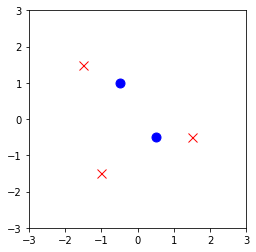

In [3]:
#data points in feature space
axes = plt.axes()
axes.set_xlim([-3,3])
axes.set_ylim([-3,3])
axes.set_aspect('equal', 'box')
plt.plot(pos_classes[:,0],pos_classes[:,1],'bo', markersize=9) # Draw positive instances
plt.plot(neg_classes[:,0],neg_classes[:,1],'rx', markersize=9) # Draw negative instances
plt.show()

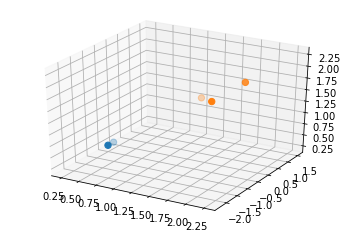

A clear separation can be seen between the two classes in the kernel space


In [4]:
#data points in kernel space
X_pos = [math.pow(x,2) for x in pos_classes[:,0]]
Y_pos = [x*y for [x,y] in pos_classes]
Z_pos = [math.pow(y,2) for y in pos_classes[:,0]]
X_neg = [math.pow(x,2) for x in neg_classes[:,0]]
Y_neg = [x*y for [x,y] in neg_classes]
Z_neg = [math.pow(y,2) for y in neg_classes[:,0]]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pos,Y_pos,Z_pos,s=40)
ax.scatter(X_neg,Y_neg,Z_neg,s=40)
plt.show()
print("A clear separation can be seen between the two classes in the kernel space")

In [5]:
#kernel matrix
def dot_product(x,y):
    prod = 0
    for i in range(0,len(x)):
         prod += x[i]*y[i]
    return prod
matrix = []
for point in data_points:
    row = []
    for point2 in data_points:
        row.append(math.pow(dot_product(point,point2),2))
    matrix.append(row)
print("Kernel matrix:")
print('\n'.join([''.join(['{:9}'.format(item) for item in row]) for row in matrix]))

Kernel matrix
   1.5625      1.0   5.0625   1.5625   0.5625
      1.0  10.5625   0.5625   0.5625   0.0625
   5.0625   0.5625    20.25      9.0     2.25
   1.5625   0.5625      9.0     6.25      1.0
   0.5625   0.0625     2.25      1.0     0.25


In [6]:
#Perceptron updates
alpha_values = [0, 0, 0, 0, 0]
b = 0
data = [A + [1], B + [-1], C + [-1], D + [-1], E + [1]]
def decision_function(x, alpha_values, data, b):
    sum_value = 0
    for idx, d in enumerate(data):
        sum_value += alpha_values[idx]*d[2]*math.pow(dot_product(d[:-1],x[:-1]),2)
    return sum_value + b
iteration = 1
changeHappened = True
while changeHappened:
    changeHappened = False
    for idx, d in enumerate(data):
        print("Iteration "+str(iteration))
        dec_val = d[2]*decision_function(d, alpha_values, data, b)
        if dec_val > 0:
            print("Decision value {} is greater than 0 so no update.".format(dec_val))
        else:
            changeHappened = True
            alpha_values[idx] += 1
            # largest vector is always C with 4.5 length squared
            b = b + d[2]*4.5
            print("Decision value "+str(dec_val)+" is below (or equal) 0, so new values alpha "
                  + str(alpha_values) +" and b "+ str(b))
        iteration += 1

Iteration 1
Decision value 0.0 is below (or equal) 0, so new values alpha [1, 0, 0, 0, 0] and b 4.5
Iteration 2
Decision value -5.5 is below (or equal) 0, so new values alpha [1, 1, 0, 0, 0] and b 0.0
Iteration 3
Decision value -4.5 is below (or equal) 0, so new values alpha [1, 1, 1, 0, 0] and b -4.5
Iteration 4
Decision value 12.5 is greater than 0 so no update.
Iteration 5
Decision value -6.25 is below (or equal) 0, so new values alpha [1, 1, 1, 0, 1] and b 0.0
Iteration 6
Decision value -3.9375 is below (or equal) 0, so new values alpha [2, 1, 1, 0, 1] and b 4.5
Iteration 7
Decision value 4.5625 is greater than 0 so no update.
Iteration 8
Decision value 3.9375 is greater than 0 so no update.
Iteration 9
Decision value 0.9375 is greater than 0 so no update.
Iteration 10
Decision value 3.5625 is greater than 0 so no update.
Iteration 11
Decision value 2.125 is greater than 0 so no update.
Iteration 12
Decision value 4.5625 is greater than 0 so no update.
Iteration 13
Decision value 3

In [11]:
X = [-1,0,1]
value = decision_function(X,alpha_values,data,b)
if value > 0:
    pred = 'o'
else:
    pred = 'x'
print("New point X "+str(X[:-1])+" has value "+ pred)

New point X [-1, 0] has value o
